In [4]:
### Uncomment and install the following line if there is an error in 1.2.
# %pip install --upgrade plotly

In [22]:
# Just run this cell. 
import numpy as np
# plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
# import seaborn as sns
from scipy.optimize import curve_fit
from ipywidgets import interact, FloatSlider

from hidden import *

# Model Building

The goal of this notebook is to give you a hands-on experience of building a model for real-world data and then making decisions based on conclusions drawn using the model. This may sound abstract and daunting at first, but by the end, you will be able to
* choose a mathematical function that captures the overall trend of the data;
* know what it means to "fit a model to data";
* make predictions using a model;
* estimate the confidence interval of your prediction;
* use your model to detect a signal;
* know what it means to refine a model;
* recognise when a model can be improved to capture more patterns in the data;
* make policy recommendations informed by model predictions;

We ask that you complete the content of this notebook linearly for the best learning experience. The questions should be slightly tricky but fun to think about, and it's ok if you answer them wrong! If you look ahead, you may encounter spoilers, which means that you will learn less!

## Part 1: Pre-lab 

Suppose you collected a set of data (e.g. hare population on an island) over a certain period of time. You want to describe the overall trend of the data in a concise way, using a mathematical function. The following are four different mathematical functions (linear, quadratic, Gaussian, and cosine) that you tried. When plotted on a graph, each mathematical function appears as a curve, and the shape of the curve is meant to capture the overall trend of the data. Although the word "model" has a more general meaning, it simply means "mathematical function" in the context of modelling numerical data.

_(Don't worry yet about the units of time or value. We purposefully hid these from you for the moment.)_

TODO:
* Typo in "time)"
* Remove the legends. They are redundant with the titles

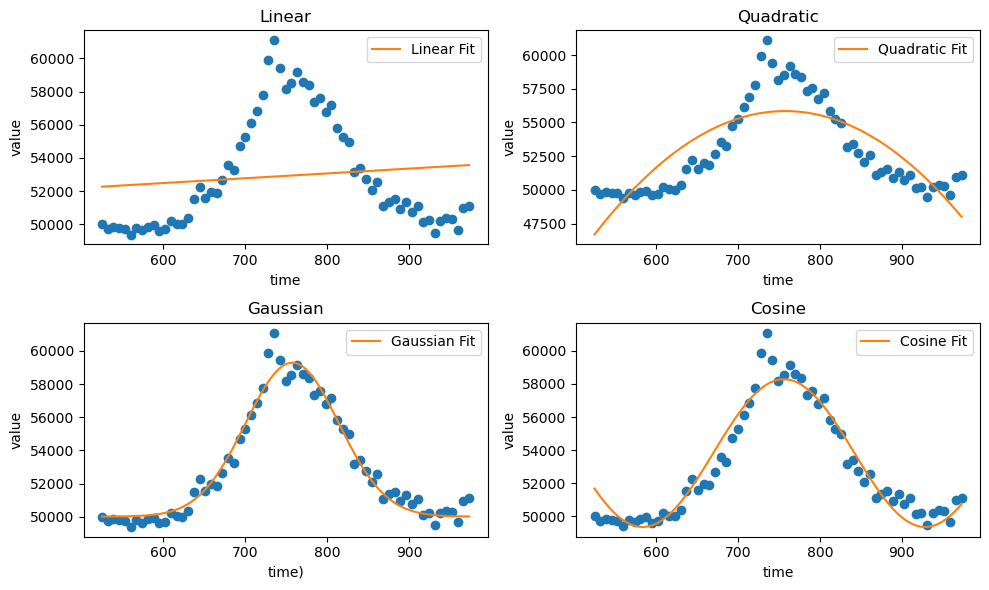

In [23]:
# Just run this cell. 
fit_pre_lab_models()
plt.show()

**Question 1.1:** Looking at the four model curves above (linear, quadratic, Gaussian, cosine), which model(s) seem to capture the trend better?

_Replace this with your answer._

**Question 1.2:** Suppose you have two models that fit data within this time range equally well. How would you decide which model is _actually_ more accurate? _Hint: A main purpose of a model is to help us make predictions._

_Replace this with your answer._ 

Let us now show more of the data outside of the original range of time. The grey background indicates the extended range of time. The same mathematical functions are plotted over this larger range of time.

TODO:
* remove the "y = ...x" text
* why is the lower limit of the grey box beyond the leftmost data point?

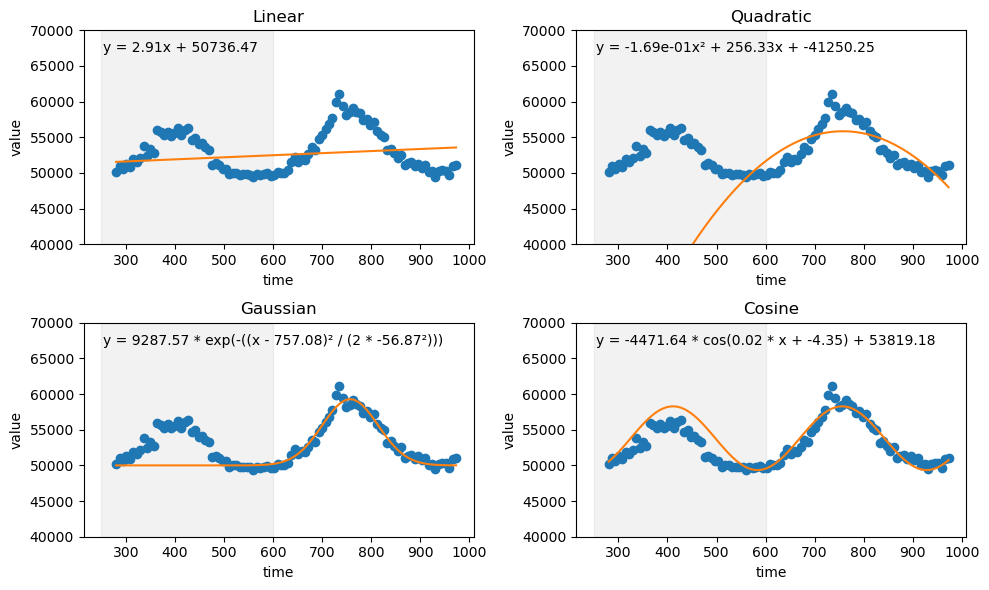

In [7]:
# Just run this cell. The gray portion represents the added data. 
expanded_plot()

**Question 1.3:** Looking at the data collected over a larger range of time, which of the four models now best capture(s) the overall trend? In other words, which model fits the data outside of the range just as well as inside? **[Hint: There's more than one! Think a bit before moving on.]**

_Replace this with your answer._

**Takeaway:**
1. Even if a model describes the trend of the data well inside of some time range, it may deviate far from the data outside of this range. Since our goal is to make predictions using the model, it is important that it describes the trend just as well outside of the range as inside. This is why the cosine model should be chosen over the Gaussian model.
2. A model doesn't have to fit the data exactly, i.e. the model curve doesn't have to pass through all (or any) of the data points. In fact, the linear model above captures an even larger trend (the height of the peaks is going up), just not the finer ups and downs. The linear curve successfully captures the "average value" of each of the peaks, and it works just as "well" for the first peak as it does for the second peak.

Let us only focus on the linear and cosine models.

TODO:
* Remove "(units unknown)"
* Use titles "Linear" and "Cosine" like we did above, and remove the legends.

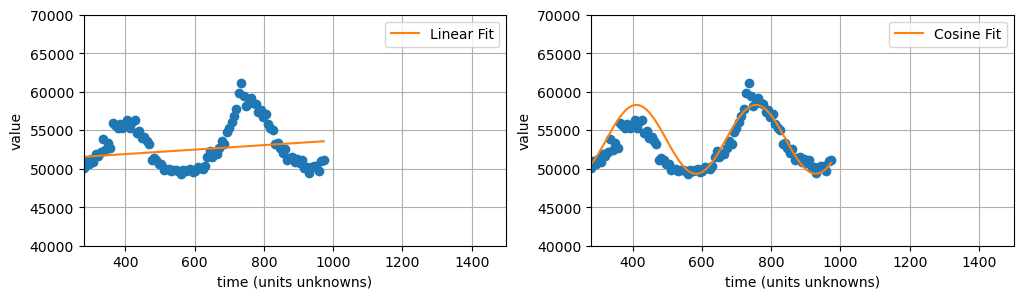

In [8]:
plot_linear_cosine(12,3)

**Linear:**  $ y = 2.91x + 50736.47 $

**Cosine:**  $ y = -4471.764 \cdot \cos(0.02x - 4.35) + 53819.10 $


[Move this down] The cosine function is defined as $ y = A \cdot \cos(Bx + C) $, $A$ is the amplitude, $ \text{period} = \frac{2\pi}{B} $, $C$ is the horizontal shift, and $D$ is the vertical shift.

In [9]:
# You can use this cell to run your calculations
linear_at_1200 = ...
cosine_at_1200 = ...

**Question 1.4**: Extend each of the models above towards the right to give a prediction of the value at $x = 1200$, along with a very rough confidence interval for each prediction, i.e. 90% confident that the true data point at x=1200 will lie within this range of values. _Hint: Use the formulas of the models above. To estimate the confidence interval of your prediction, see how far along the y-axis the original data typically deviates from the model curve._

_Edit this markdown cell and report your answer for each item below._

- Prediction from the linear model: 
- 90% confidence interval: from ... to ...
- Prediction from the cosine model: 
- 90% confidence interval:

**Question**: Which model gives a more _precise_ prediction, i.e. its confidence interval is narrower? Are the two models' predictions at $x=1200$ consistent with each other, i.e. do the two confidence intervals overlap with each other?

_Replace this with your answer._

**Takeaway**: Sometimes, two models that seem drastically different can make similar predictions, if they each capture some overall trend of the data. If the confidence intervals of the models overlap, that means the predictions from both models are consistent with each other, and we may choose to use either one to make decisions. In our case, the linear model is easier to calculate than the cosine model since it has fewer parameters (two versus four), but its prediction is less precise since the confidence interval is wider. Even though the linear model fits the data less accurately than the cosine model, we can still make useful predictions using it.

___

## Part 2: The linear model

Now, we'll look at an even wider range of the full data. We will be using the crude linear model to make predictions and identify when something suprising happens, i.e when the data deviates a lot from the model.

Let's start by loading our data and storing the time values in `xdata` and values in `ydata`. Remember, no details about the context of the data will provided.

In [24]:
timeseries_data = get_data()
xdata = np.array(timeseries_data['time'])
ydata = np.array(timeseries_data['value'])

In this section of the notebook, we will visualize, analyze and fit our data to a model and investigate whether our model is good. To begin, let's plot our timeseries data. You'll recognize parts of this data from the pre-lab above.


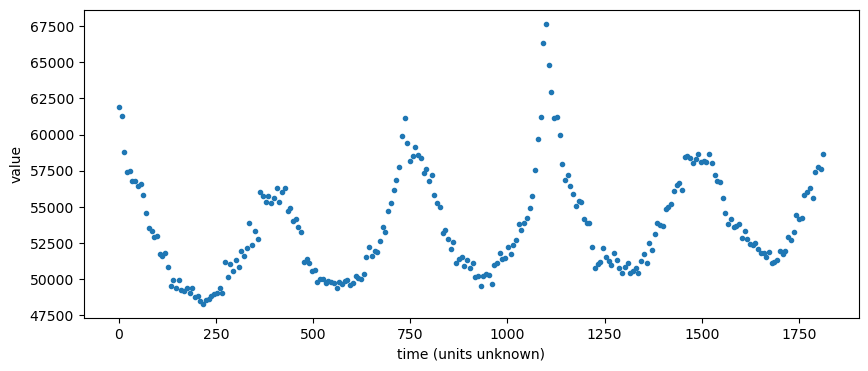

In [25]:
plt.figure(figsize=(10, 4)) 
plt.plot(xdata, ydata, '.')
plt.xlabel('time (units unknown)') 
plt.ylabel('value')
plt.show()

We will create a linear model, that asssumes, despite the ups and downs in the data, there's an average value that represents the entire dataset reasonably well over time. Recall from the prelab that even a very crude model can be very useful.

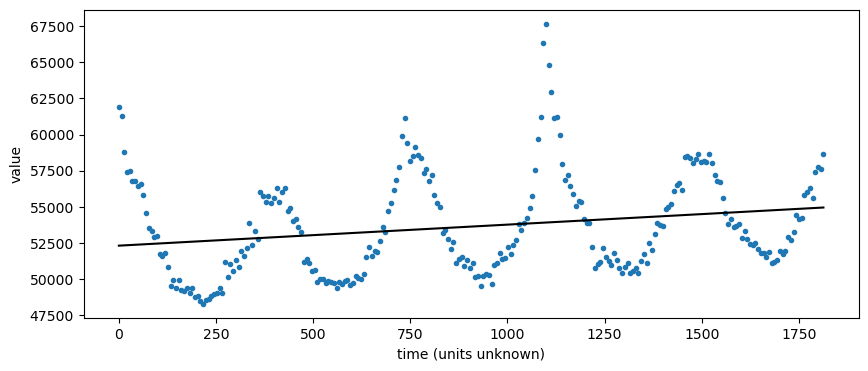

In [26]:
popt, _ = curve_fit(linear_model, xdata, ydata)
m_fit, c_fit = popt

plt.figure(figsize=(10, 4))
plt.plot(xdata, ydata, '.')
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), color="black")
plt.xlabel('time (units unknown)')
plt.ylabel('value')
plt.show()

Potentially define threshold for students as a way to describe the width of the band.

In [27]:
plot_lin_band()

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

Outside of this range, we want to make prediction. We'll reveal the true nature of the data soon.

For now, pretend the data is about the seasonal hare population on some island and the time is in weeks. We need to know when something abnormal happens to the hare population at some later time. That means we need to give a range of values in which the hare population is normal and if a future hare population value is outside of this range, then we can say something suprising happened to our hares.

**Question:** Using the percentages below, adjust the slider to find what is the amount of deviation from the model within which 90% of the data lies? 

- 68%:
- 80%:
- 95%:

**Takeaway:** If a future value, say t = 2000, falls outside the 95% band, then we can be 95% sure that something abnormal has happened, in this example to the hares. In other words, there is only a 5% chance that this far-from-threshold value can arise by chance based on our model.

**Question:** Set `deviation_at_95_percent` to the value you found in the question above.

In [28]:
deviation_at_95_percent = 6100

Now, some time has passed and we have collected a couple more points of data, and it seems like something suprising has happened. We can say this precisely using statistics!

In [15]:
# %matplotlib notebook

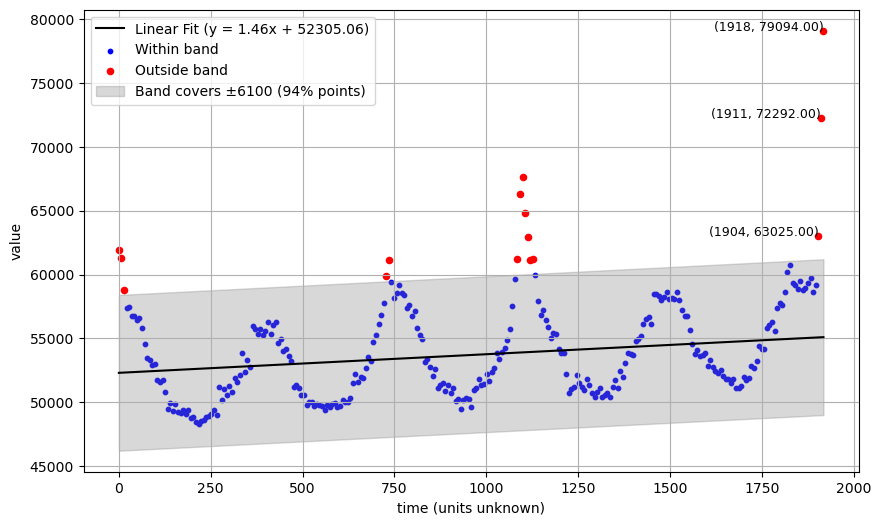

In [30]:
plot_lin_all(deviation_at_95_percent) 

Now we will plot the  rest of the data, put in threshold values to the value you obtained above the function below that will plot threshold band and show the red points.

**Question:** From the plot above, at what time value does our new data start to deviate significantly from the model? This is when you should alarm the wildlife biologists about the hare population. 

In [31]:
# Replace the ... with the time value you identified
time_value = 1904

**This data is not about the hare population. In fact, it is about the total number of deaths in the United States in any given week.**

As a statistician at the CDC, your job has been to monitor this data. You've found this date where the weekly death count has surpassed your threshold (outside the band), what would you report to your superior? Include the statement of fact and your credence level. 

_Replace this with your answer_

Answer: At the threshold we choose, we would sound At 95%, in every 20 alarm, there is one that is false positive. On average, you would have 2.5 false alarms.

**Takeaway:** We chose a model (linear) that captured the overall trend of our data and fitted the model to our data. Then we we're able to identify the range of values in which, say 95%, our data falls. If any future data point falls outside of this range, then we can be 95% sure that it is a "signal" (something that is out of the ordinary of the usual trend).

___

[For us] Where we are using error bars
- deviation from a model (based on a residual) for capturing suprise points 
- measurement errors
- intrinsic fluctuation (coming from the poisson model), get about ~250

## Part 3: Refining the model

We used our very crude linear model to make a real world alarm for weekly deaths in the US. But obviously the model was very crude. Can we do better?

The linear model captured the overall slight rise of our data over time. However, there is clearly a periodic fluctuation that is not captured by the linear model. How do we systematically show that there are still patterns in the data that have not been captured by the model we have chosen?

To do that, we have to know how precisely the data was collected. In other words, we need to estimate the measurement error of our data.

If the measurement errors are very big (that is, measurements are very imprecise), then any remaining pattern may just be a result of random measurement error. Other the other hand, if the measurement errors are very small (that is, very precise), then we more confident that the remaining patterns are real and can be captured by a refinement of our model.

We will walk you through this process.

_Replace this with your answer._

_Heads up, we will discuss systematic uncertainty later._

There are two sources of statistical uncertainty. 

First, is that the true value is random. In other words, in any given week, the number of deaths could be higher or lower just by chance, rather than some common cause. Suppose that in any given year we have 2.8 million deaths, this averages to about 53000 deaths a week (comparable to our data). Click the following button many times to see the actual number of deaths a week. 

_CREATE DEMO [Find the poisson model from EPS88, also plotMockAdmissionPerMajorWithButton from admission_rate notebook, slider to estimate the number of deaths, button to randomly pick from the distribution the number of deaths]_

**Question:** Is the true number of deaths always equal to the average value of 53,000? If not, how much does it fluctuate? Crudely estimate the 68% confidence interval by clicking the button many times.

_Replace this with you answer_

**Takewawy:** The value you typed above is the instrinsic statistical error in the true number of deaths. In other words, the true number of deaths per week fluctuates by about this amount by random chance alone. 

The second source of uncertainty is from the measurement of the true value. The measurement uncertainty means that a true value exists but what we measure may be slightly higher or lower due to imperfections in the measurement instrument. In our case, the measurement instrument is clerical records (the manual collection of instances of death). 


**Question:** Come up with ways the clerical recording of deaths may be inaccurate? Iseach of these a source of statistical or systematic error?

_Replace this with you answer_

Unfortunately the CDC did not provide us with an estimate of a clerical error. Suppose that the measurement error due to clerical error is comparable to that of the intrinstic flucuation of the true number of deaths. 

In [50]:
intrinstic_luctuation = ...
measurement_error = ...

In [52]:
#Compute this with the square root of sqaures in the background
total_error = ...

[FIX]This is +/- 68%... if our model captured the underlying patterns in the data perfectly, we would expect that the model curve would pass through 68% of all the error bars because statistical uncertainity exists....

[Turn into text]**Question**: When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

Let's see how our very curde model (which clearly didnt capture all the patterns performs).

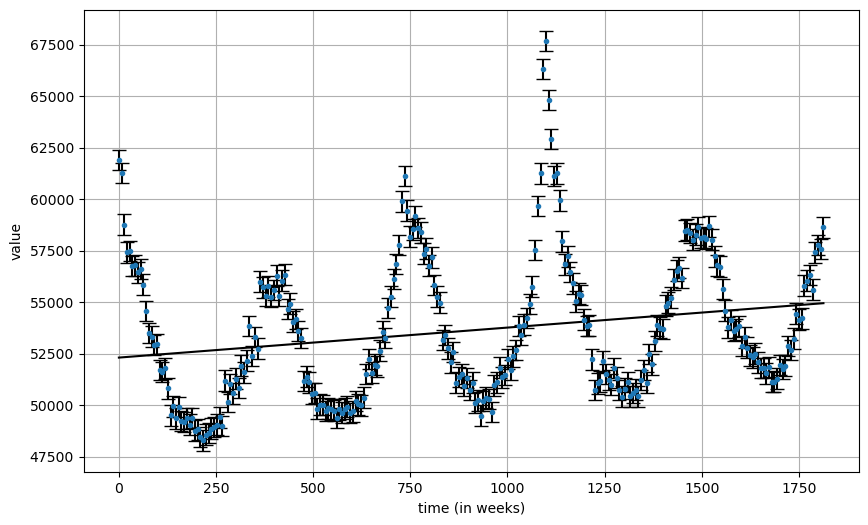

In [45]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=500, fmt='.', ecolor='black', capsize=5)
plt.plot(xdata, linear_model(xdata, m_fit, c_fit), '-', label='fit', color = "black")
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

_Replace this with your answer._

Now, let's actually calculate that percent.

In [46]:
yerr = 500 # This is the +/- 1000 given to you. 

lin_mod = linear_model(xdata, m_fit, c_fit)
error_bar_passes = ((lin_mod >= (ydata - yerr)) & (lin_mod <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The linear model passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The linear model passes through 21 error bars out of 260 points.
Percentage: 8.08%


**Question:** Based off the percent of error bars, do you think we should add more complexity or is our model? Explain your reasonsing. // generally, motivate that we can do better but we'll here for now 

_Replace this with your answer._

**Takeaway**: We should expect our model to capture 68% of the points because our confidence in data point true value is 68% (hence 68% error bars). Because our model does not capature 68% of the points, there is room to refine our model to capture more of those data points. [CHANGE bc prob wont be 68%]

From the linear model we have captured slowly rising trend in our data. Let's add a cosine curve on top of the linear model to also capture the periodic fluctuations. Below is the model equation (you can think of it as a cosine curve with a tilt).

$$
f(x) = A \cos\left(\frac{2\pi}{T}(x-x_0)\right) + Bx + C
$$

Heads up, we will see if these paramters make sense (i.e. should find that a year is 365 days) later in the notebook.

In [32]:
plot_tilted_band()
plt.show()

interactive(children=(IntSlider(value=1, description='± deviation from model', max=15000, step=10), Output()),…

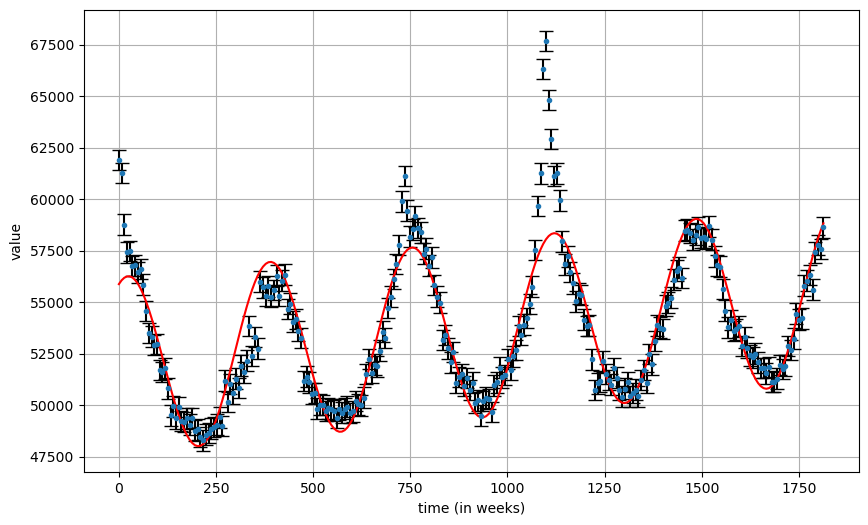

In [43]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=500, fmt='.', ecolor='black', capsize=5)
plt.plot(xdata, fit_data_with_tilt, '-', label='fit', color = "red")
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

**Question:** How far to we have to go from our model now to capture the 95% of the points? How does this compare to the linear model? 

_Replace this with your answer._

The linear curve captures the rising trend, but there is clearly also a smaller wavy trend using the cosine model. Now that we are considering both the long term trend vs short-term fluctuation we are able to capture our data much more precisely with our data.

Let's calculate the number of error bars now. 

In [54]:
yerr = 500 ## use the values calculated av=bove, refer to them to explain the text, hide this code as well 

error_bar_passes = ((fit_data_with_tilt >= (ydata - yerr)) & (fit_data_with_tilt <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

The fit line passes through 92 error bars out of 260 points.
Percentage: 35.38%


**Takeaway:** We have accurately modeled the weekly deaths up to statistical uncertainties that we know that exist, assuming we have done the error bar estimations correctly.  Any further modeling would have to incorportate modeling the sources of these uncertainties.  

The whole threshold story, the whole data.

Though the two models performed similarly, can you imagine a hypothetical situation where a suprising excess death count would be better cpature by our cosine model but the linear model. 

Better wordiing, make into a questions
Even though with both model we sounded the alarm in the same week, there are situations in which the tilted cosine model is able to identify a signal that the linear model can not.

Hint: Think about the shape of our bands. 

Answer: On the way down.

### 1.2 Adding More Parameters

**Question 1.2.1**: Based on the model you built above, describe what patterns and trends you notice? What mathematical function do you know that best mimics the pattern applied to the data above?

_Replace this with your answer._

NameError: name 'fit_linear' is not defined

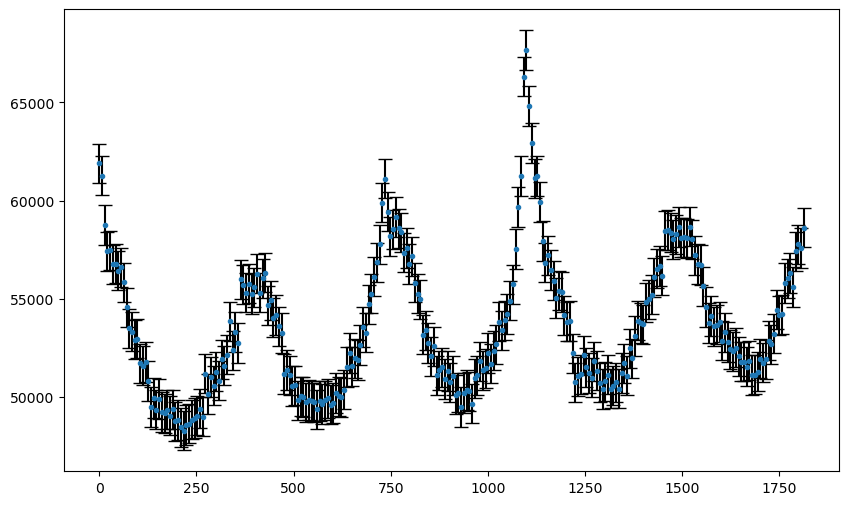

In [18]:
#Just run this cell
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_linear, '-', label='fit')
plt.legend()

plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

One function we can use is the cosine function, a good choice when working with data that looks periodical (i.e. occurs in phases).

$$
f(x) = A \cos(B(x - C)) + D
$$

Providing initial guesses for more complex models can help guide the computational process towards a more accurate and efficient solution. Use the widget below to experiment with what you can use as your intial guesses for the parameters A, B, C, and D. Don't worry about fitting the perfect model, a rough start is to get started will be good enough for our optimizing function later!

_For reference, we can interpret the parameter **A** as the amplitude (the vertical distance from the top of a peak to the center line), **B** as the parameter that controls the width of the wave (how wide or narrow a wave is), **C** as the parameter that represents the horizontal shift, and the constant **D** represents a vertical shift (moving the whole model up or down)._

In [15]:
#Just run this cell.
cosine_widget()

interactive(children=(FloatSlider(value=0.0, description='A', max=10000.0, readout_format='.0f', step=1.0), Fl…

**Question 1.2.2**: Assign the values you choose for A, B, C, and D to `guess`, in that order, as a list. 

In [16]:
guess = [4000, 0.02, 20, 54000] 

Using the values for A, B, C, and D above as our guesses, let's find the best parameters that minimize error. This may be unfamiliar, but we will leverage `curve_fit` function from the scipy.optimize library which finds the best fit model (given we provide good starting point), doing most of the heavylifting for us. You can read the documentation here for [curve fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) if you're curious.

**Question 1.2.3**: Fill in the code for `cos_func` which the specific shape of our curve given some paramters. Then, use that to define `fit_cosine`, which is the model that will be plotted over the data.

_Hint: You'll know your guesses were good if the model is nicely fit to the data._

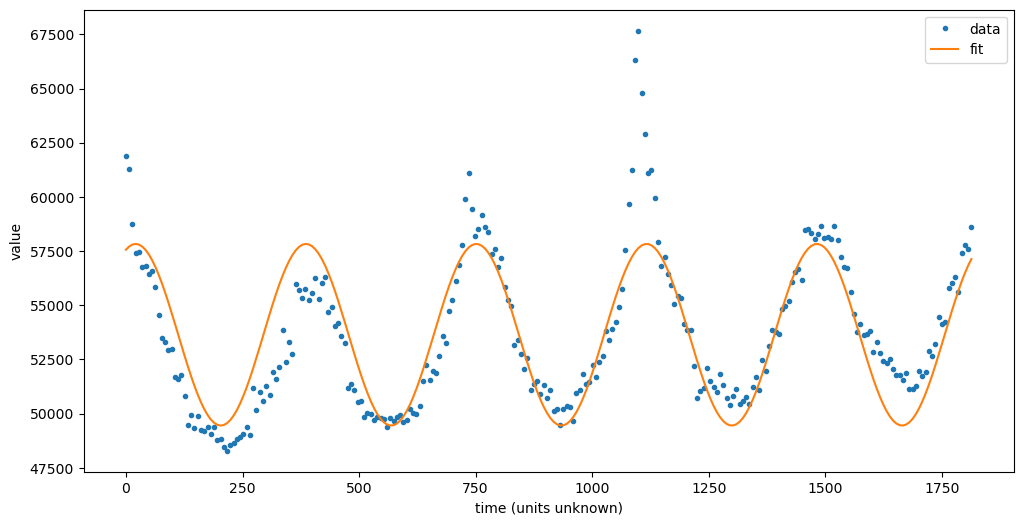

In [17]:
# Decide what students should code here, how much scaffolding should be given.
plt.figure(figsize=(12, 6)) 

def cos_func(x_data, A, B, C, D):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B*(x_data - C)) + D


#Here, curve_fit finds the best values for each parameter of our model. Do not change this part of the code.
parameters, _ = curve_fit(cos_func, xdata, ydata, p0=guess) 
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]

# REPLACE ... WITH YOUR CODE
fit_cosine = cos_func(xdata, fit_A, fit_B, fit_C, fit_D)

# DO NOT CHANGE THIS CODE
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_cosine, '-', label='fit')
plt.xlabel('time (units unknown)')
plt.ylabel('value')

plt.legend()
plt.show()

Nice! Our model looks more accurate to our data now. 

### 1.3 Evaluating goodness of fit

With more parameters, our model looks better fit to the data. However, it's crucial to ask if the chosen model, like a cosine function in this case, truly reflects the underlying patterns of the data. Do we need to make the model more complex or do we have too many parameters and risk overfitting? How can we determine if what we have right now is a good model? -- remove

_Use this space to write down any ideas you have_

The approach we will use is evaluating goodness of fit, checking whether our data is likely to be from a specific theoretical distribution we've defined. For example, you may have seen or worked with tests such as chi-square or coefficient of determination (R-squared). Our approach will involve using error bars and we will walk through why first.






**New information!: The data we are working with is about historical weekly death counts in a large country. Week 0 is some start date and the following values represent the subsequent weeks in the time period.**

**Question 1.3.1:** Let's say our model is the true number of deaths and the observed points fluctuate due to uncertainty and error. What are some examples of sources of uncertainity and/or error? Answer in the context of what is revealed in the new information above.

_Replace this text with your answer_

**Question 1.3.2:** The CDC **change** didn’t provide us the error bars, so as good scientists, we should look. What do you expect this range to be? Consider what you wrote in the question above and try to estimate the systematic or statistical uncertainty?

_Replace this text with your answer_

For each point, we are 68% confident that was true death count value was +/- 1000 deaths (i.e. a 68% error bar). As you may have described above, some go unaccounted for, are registered in following weeks, and other factors that influence error. The justification we will move forward with is that for every 1000 people who die, there are 2 clerical mistakes (creating roughly +/- 1000 deaths given that our average is 53600 deaths a week). Here's what that looks like. ADD: random chance between days

**Question 1.3.3**: When we create our model, we want it to pass close to about 68% of our data points. Answer why you think so below. In your response, consider what it means about our model if our line doesn't pass through roughly 68% of our data? What if passes through more than 68% of points?

In [ ]:
#For me: Error bars are based of themeasurement process. Modeling the clerical error would elimate the need to have the error bars at the scale we chose. 

_Replace this text with your answer_

Now, let's actually calculate that percent.

**Question 1.3.4**: Fill in the following code to calculate the percent of error bars our model passes through. Set that value equal to `percentage_passes`. You might find it helpful to use `fit_cosine`, `yerr`, `ydata`, and `xdata` in your answer. 

In [ ]:
yerr = 1000 # This is the +/- 1000 given to you. 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_cosine >= (ydata - yerr)) & (fit_cosine <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

**Question 1.3.5**: Based off the percent of error bars, do you think we should add more complexity? If so, what pattern in the errors do you notice that we could address (Hint: consider what you did in Part 1.1).

_Replace this text with your answer_

We will add a tilt to our cosine model, such that new model is modelled by a combination of the cosine and linear components. Specifically, _D_ now represents the coefficient of the linear term and _E_ represents the y-intercept of the linear term.

$$
f(x)=A\cos(Bx+C)+D+Ex 
$$

**Question 1.3.6**: Let's apply what we did in 1.2.3 to our new model with the additional parameter. Then, calculate the new percent of error bars that the fitted model passes through. 

In [ ]:
def tilted_cosine(x, A, B, C, D, E):
    # REPLACE ... WITH YOUR CODE
    return A * np.cos(B * x + C) + D * x + E

    
initial_guess = [max(ydata) - min(ydata), np.pi/200, 0, 0, np.mean(ydata)]

parameters, _ = curve_fit(tilted_cosine, xdata, ydata, p0=initial_guess)
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
fit_D = parameters[3]
fit_E = parameters[4]

# REPLACE ... WITH YOUR CODE
fit_data_with_tilt = tilted_cosine(xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

# DO NOT CHANGE 
plt.figure(figsize=(10, 6))
plt.errorbar(xdata, ydata, yerr=1000, fmt='.', label='data', ecolor='black', capsize=5)
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')
plt.legend()
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.grid(True)
plt.show()

In [ ]:
yerr = 1000 

# REPLACE ... WITH YOUR CODE
error_bar_passes = ((fit_data_with_tilt >= (ydata - yerr)) & (fit_data_with_tilt <= (ydata + yerr))).sum()
total_points = len(xdata)
percentage_passes = (error_bar_passes / total_points) * 100

print(f"The fit line passes through {error_bar_passes} error bars out of {total_points} points.")
print(f"Percentage: {percentage_passes:.2f}%")

Takeaway: We have accurately modeled the weekly deaths up to statistical uncertainties that we know that exist, assuming we have done the error bar estimations correctly.  Any further modeling would have to incorportate modeling the sources of these uncertainties.  

Takeaway: We have accurately modeled the weekly deaths up to statistical uncertainties that we know that exist, assuming we have done the error bar estimations correctly.  Any further modeling would have to incorportate modeling the sources of these uncertainties.  

<!-- **Question 1.3.7**: What did adding more complexity to our model do? How do you now feel about calling our current model "a good model"? -->

_Replace this text with your answer_

## Part 3: Finding a signal

Now that we have a reasonable model, let's investigate what data point deviations are reasonable and which ones are not. 

Let's remind ourselves what the data and the model we built in the previous part looks like. 

In [ ]:
#Just run this cell.
plt.figure(figsize=(12, 6)) 
plt.plot(xdata, ydata, '.', label='data')
plt.plot(xdata, fit_data_with_tilt, '-', label='fit')
plt.xlabel('time (in weeks)')
plt.ylabel('value')

### 2.1 Determining a threshold

**Question 2.1.1:** Fill in the following code cell to calucate our model's redisuals and make a residual plot. 

In [ ]:
model_residuals = ydata - fit_data_with_tilt #Code to fill in. 
plt.figure(figsize=(12, 6))
plt.plot(xdata, model_residuals, '.')
plt.xlabel('time (in weeks)')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

**Question 2.1.2:** What do you notice about our residual plot? What does this say about the complexity of our model?


_Replace this text with your answer_

To determine the percentage of data points that deviate significantly from the fitted line, we need to establish a threshold. This threshold can be a multiple of the standard deviation (SD) of the residuals. Use the widget below to play around with different threshold values until you find a threshold you feel comfortable with.

In [ ]:
# Should we make this hidden?
std_dev_residuals = np.std(model_residuals)

def update_plot(threshold_factor):
    threshold = threshold_factor * std_dev_residuals
    is_outlier = np.abs(model_residuals) > threshold

    plt.figure(figsize=(14, 7))
    plt.scatter(xdata, model_residuals, label='data', color='blue', s=10)
    outlier_points = np.array(xdata)[is_outlier]
    outlier_residuals = np.array(model_residuals)[is_outlier]
    plt.scatter(outlier_points, outlier_residuals, label='outliers', color='red', s=20)
    plt.axhline(0, color='grey', lw=0.8)
    plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+{threshold_factor} SD ({threshold:.2f})')
    plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-{threshold_factor} SD ({-threshold:.2f})')
    plt.xlabel('time (in weeks)')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

slider = FloatSlider(value=1, min=0, max=5, step=0.1, description='Threshold SD:', readout_format='.1f')
interact(update_plot, threshold_factor=slider)
plt.show()

**Question 2.1.3:** What threshold did you choose? In your own words, what does this threshold represent in the context of the data (i.e what signal does a given week's excess death residual signal)?

_Replace this text with your answer_

### 2.2 Testing our model

We now have some new data to introduce. This data is chronlogically after the data we have built our model on and chosen our standard deviation cutoff from in the sections above. Let's see how our model holds up.

In [ ]:
# all_xdata = (excessdeaths['Week Ending Date'] - excessdeaths['Week Ending Date'].min()).dt.days
# all_ydata = excessdeaths['Number of Deaths'].values 
# all_xdata = np.asarray(all_xdata)
# all_ydata = np.asarray(all_ydata)

In [ ]:
# Just run this cell
all_xdata, all_ydata = get_all_data()

In [ ]:
plt.figure(figsize=(12, 6)) 

fit_cosine_all_data = tilted_cosine(all_xdata, fit_A, fit_B, fit_C, fit_D, fit_E)

plt.plot(all_xdata, all_ydata, '.', label='data')
plt.plot(all_xdata, fit_cosine_all_data, '-', label='fit')
plt.xlabel('time (in weeks)')
plt.ylabel('value')
plt.legend()
plt.show()

Our new data seems deviate significantly from our model. Let's also plot the residual model.

In [ ]:
all_data_residuals = all_ydata - fit_cosine_all_data

plt.figure(figsize=(12, 6))
plt.plot(all_xdata, all_data_residuals, '.')
plt.xlabel('time (in weeks)')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

Say we use a threshold of +/3 SD. Let's apply that to all our data now.

In [ ]:
threshold = 3 * std_dev_residuals
is_outlier = np.abs(all_data_residuals) > threshold

plt.figure(figsize=(14, 7))
plt.scatter(all_xdata, all_data_residuals, label='Data', color='blue', s=10)
outlier_points = np.array(all_xdata)[is_outlier]
outlier_residuals = np.array(all_data_residuals)[is_outlier]
plt.scatter(outlier_points, outlier_residuals, label='Outliers (> 3 SD)', color='red', s=30)
plt.axhline(0, color='grey', lw=0.8)
plt.axhline(threshold, color='green', linestyle='--', lw=1, label=f'+3 SD ({threshold:.2f})')
plt.axhline(-threshold, color='green', linestyle='--', lw=1, label=f'-3 SD ({-threshold:.2f})')
plt.xlabel('time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()

What could explain this pattern? Let's find the first point in the **new added data** that is above our threshold.

In [ ]:
is_outlier = np.abs(all_data_residuals) > threshold
outlier_x_values = np.array(all_xdata)[is_outlier].tolist()

filtered_outlier_x_values = [x for x in outlier_x_values if x > 1850]
filtered_outlier_x_values[0]

**New Information: The first week in our timeseries of weekly excess death counts is January 10, 2015.**

**Question 2.2.1**: What is the date we first saw our new data go above the threshold? What is the signal suggesting? What was happening around this date?

In [ ]:
initial_date = pd.to_datetime('2015-01-10')

# Calculate the date 1904 weeks after this initial date
date_after_1904_days = initial_date + pd.Timedelta(days=1904)
date_after_1904_days

_Replace this text with your answer_

### 2.3 Interpreting our model in context

**Question 2.3.1:** In the context of the data, how would you define what is a signal? What could this signal mean to governments and policymakers?

_Replace this text with your answer_

**Question 2.3.2:** What might be some issues with our model? Name and explain at least two.

_Replace this text with your answer_ (Ex: We've been building a model as if any given year is the same, and that's not necessarily true.)

# Post-lab

## Reflection

Write some pros and cons of the linear and cosine model. The cosnine model has a smaller prediction level. IF w

- The cosine model has a smaller prediction level. If something bad happens, we can catch it more accurately. More complicated.
- The linear model has a larger prediction level. Less complicated.

** Want to emphasize the real world implications.  

## Part 4: Hill's Criteria

As of June 2023, [over 1 million people in have died from COVID-19 in the US](https://www.nfid.org/infectious-diseases/covid-19/) since the virus first emerged. Looking back now, it's obvious the massive increase in excess deaths we saw once we applied our model to our new data came from deaths related to COVID-19.  

However, without this hindsight, our national government asks what else could be causing this uptick before jumping the gun and alerting the whole nation. How do we know COVID-19 directly created more excess deaths? It is impossible to conduct an RCT and introduce the virus to some populations and not in others. Instead we can use Hill's Criteria to show compelling evidence that COVID-19 _causes_ excess mortality.

**Question 3.1:** For each of Hill's criteria, what evidence, if observed, would support that criterion?

- **Prior Plausability:** _Replace this text with your answer_
- **Temporality/Temporal Sequence:** _Replace this text with your answer_
- **Specificity:** _Replace this text with your answer_
- **Dose-response Curve:** _Replace this text with your answer_
- **Consistency Across Contexts:** _Replace this text with your answer_




## Part 5: Orders of Understanding  [try adding into the model building, no jargon]

Looking back, let's explore the order of understanding for each parameter we we added into our model.

- 1st order - the mean (caputured the data into a single number, what does a deviation from the linear mean), season fluctation, not random
- 2nd order – the fluctuation (pattern is captured by cosine, with three parameters), this capture more of the data pattern
- 3rd order – the drift (population growth) 

Creating a model can be complicated at first, but it can be built up slowly.

**Question 4.1**: When do we know when to stop? Consider if it is necessary or useful to know what each parameter means?


_Replace this text with your answer_

**Question 4.2**: Large langauge models (LLMS) are giant models with billions of parameters that are applied on a large amount of data for training and inference. What problems might we run into? 

_Replace this text with your answer_

## Estimate the total number of excess deaths


Calculate the excess, small coding exce

Take the residual from that day onwards from that day onwards

Why hide the context? Blind analysis and avoid confirmation bias because we already know when COVID has happened.  

## Sanity check 


Interpret each of the parametrs
Interpret the title (population growth per week), look at external sources
//Double check the values 